In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [5]:
#%% [markdown]
# ## 1. Random súlyok táblázatos megjelenítése

#%%
import numpy as np
import pandas as pd
import random


# Betöltjük az elmentett súlyokat
weights_data = np.load("../data/weights/simplemlp_weights.npz")

# Összegyűjtünk néhány véletlen elemet
rows = []
for key in weights_data.files:
    arr = weights_data[key]
    flat = arr.flatten()
    for _ in range(2):
        idx = random.randrange(flat.size)
        rows.append({
            "param": key,
            "index": idx,
            "value": float(flat[idx])
        })

# DataFrame és megjelenítés
df = pd.DataFrame(rows).sample(10).reset_index(drop=True)
df["value"] = df["value"].round(4)
df

,param,index,value
0,W1,5740,-0.1142
1,W2,237,0.2818
2,W0,80763,-0.0770
3,W1,3322,0.0500
4,b0,47,0.0079
5,b2,8,-0.0100
6,b2,1,0.0313
7,W0,53661,-0.0339
8,b1,7,0.0009
9,W2,48,0.1057


Súlyok betöltve: ../data/weights/simplemlp_weights.npz


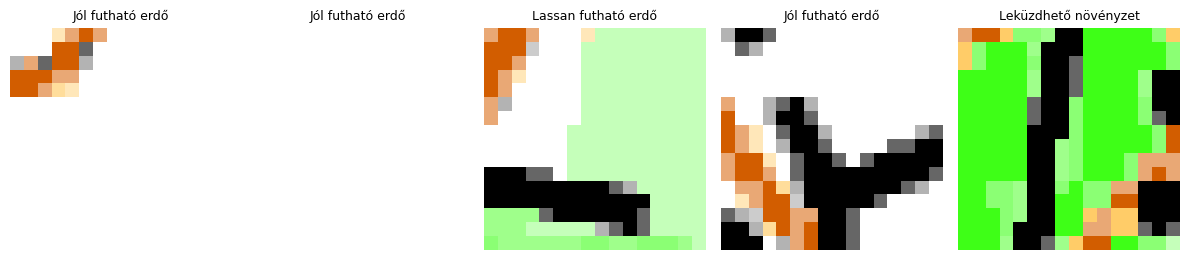

In [11]:
# ## 2. Vizuális modell-teszt 5 véletlen mintával

#%%
import numpy as np
import matplotlib.pyplot as plt
import random
import sys, os


sys.path.append(os.path.abspath(".."))

#TODO multy layer perceptron

# Győződjünk meg róla, hogy a model.py elérhető
#sys.path.insert(0, os.getcwd())
from simplemlp.model import SimpleMLP

# Dataset betöltése
data = np.load("../data/processed/dataset_preProcessed.npz")
images = data["images"]
labels = data["labels"]
X = images.reshape(len(images), -1) / 255.0

# Emberi olvasható osztálynevek
class_names = [
    "Jól futható erdő", "Leküzdhető növényzet", "Lassan futható erdő",
    "Nehezen futható erdő", "Nyílt terület (világos)", "Nyílt terület (erős)",
    "Durva nyílt terület", "Sekély vízfelület", "Áthatolhatatlan víz",
    "Fekete (út/szikla)"
]

# Modell inicializálása és súlyok betöltése
model = SimpleMLP()
model.load_weights("../data/weights/simplemlp_weights.npz")

# 5 véletlen minta kirajzolása predikcióval
indices = random.sample(range(len(images)), 5)
plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    pred = model.predict(X[idx:idx+1])[0]
    plt.title(class_names[pred], fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()